In [13]:
import torch
from IPython.display import display, HTML, Image
from torch_geometric.loader import DataLoader
from matplotlib import pyplot as plt

from settings import *
from generator import generate_organism
from GNCAConv import Conv
from visualizer import Visualizer
from evo_trainer import Evo_Trainer
from enums import EnvironmentType, ModelType
from food_env import *

In [14]:
wall_amount = 200
food_amount = 1000
centered_env = Centered_Env(food_amount=food_amount, wall_amount=wall_amount//4)
cluster_env = Cluster_Env(clusters=60, cluster_size=30, wall_amount=wall_amount//4)
circle_env = Circle_Env(circles=3, food_amount=food_amount*2, wall_amount=wall_amount)
spiral_env = Spiral_Env(spirals=3, food_amount=food_amount, wall_amount=wall_amount)

In [15]:
train_config = Train_Config(stdev=0.1, popsize=10, 
    name='hidden14', problem_searcher=ProblemSearcher.CMAES,
    with_samplepool=False, timesteps=200)

In [16]:
settings = Settings(
    device = torch.device('cpu'),
    batch_size = 8,
    n = 20,
    food_envs=[centered_env, cluster_env, circle_env, spiral_env],
    scale = 4,
    wrap_around = True,
    
    model_type = ModelType.LocalOnly,

    radius = 0.04,
    radius_food_scale = 5,
    consume_radius_scale = 3/4, 
    consumption_edge_required = 1,
    noise = 0.0,
    energy_required_to_replicate = 30,
    train_config=train_config,

    radius_wall_scale = 5,
    radius_wall_damage_scale = 2,
    wall_damage = 5,

    radius_long_scale=2,
)

In [17]:
graphs = [generate_organism(settings).toGraph() for _ in range(settings.batch_size)]
loader = DataLoader(graphs, batch_size=settings.batch_size)
graph = next(iter(loader))
visualizer = Visualizer(settings)

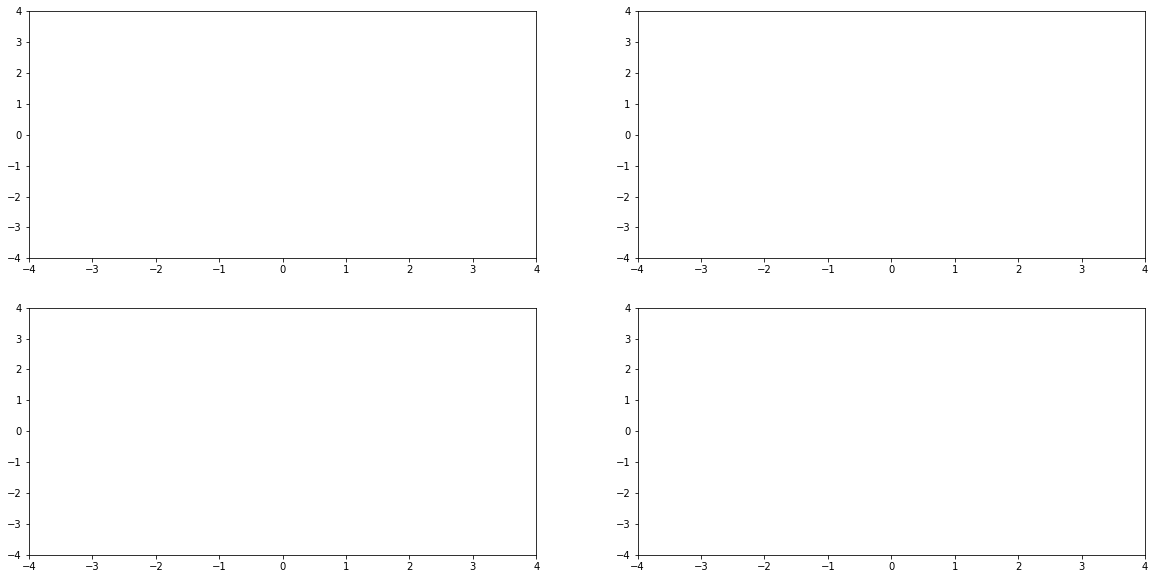

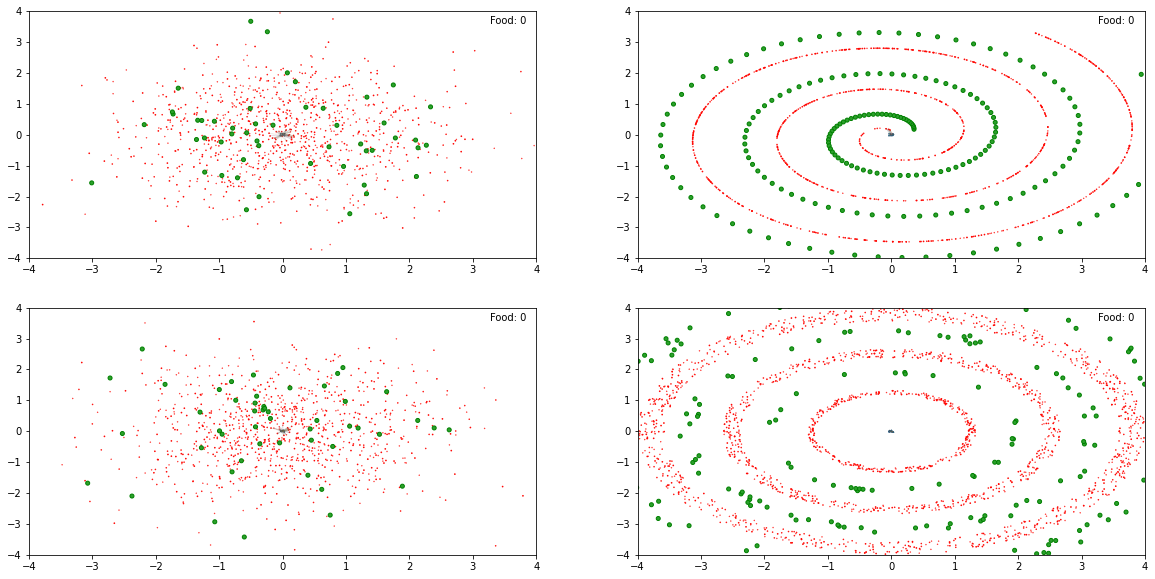

In [18]:
visualizer.plot_organism(graph)
visualizer.figure